# Logistic Regression : Classification

In [ ]:
-> Supervised 
-> Binary Classification

In [ ]:
=> Hypothesis Function:-
    h0(x) = 1/{1+e^(-0'*x)} ; for Logistic regression
=> Squared Error Loss Function (Non Convex):-(used in linera regression)
    J(x) = 1/m * summation (y(i) - h0(x(i)))^2
=> Log Loss/Binary Cross Entropy:-
    Avg loss = -1/m * summation [ y(i)*log(h0(x(i))) + (1-y(i))*log(1-h0(x(i)))] over i=1 to i=m
=> Likelihood of theta:-
    L(0) = Multiplication of {h0(x(i)^y(i))*(1-h0(x(i)))^(1-y(i)) } over i=1 to i=m
                    

In [ ]:
# Gradient Descent Update Rule for Logistic Regression:-
    
    theta-J = theta-J + mu*summation{[y(i) -h0(x(i))]x-J(i)}
    Here 0j or theta-J is sigmoid function 

# Logistic Regression Implementaion:-
    - Data Preparation
    - Visualisation
    - Create Train and Test Set
    - Create a Logistic Regression Model
    - Predictions
    - Decision Boundary
    - How to use sk-Learn

In [2]:
# Data -Generate  X belongs to R^2 ,Y belongs to (0,1)
 
import numpy as np
import matplotlib.pyplot as plt


In [7]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


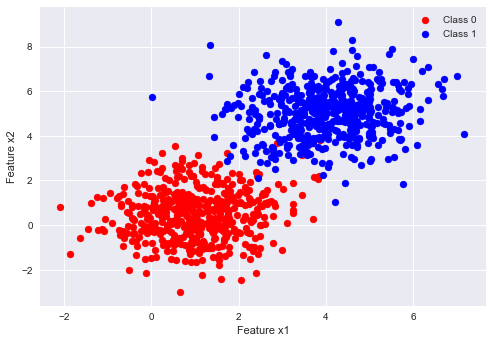

In [11]:
plt.style.use("seaborn")
plt.scatter(dist_01[:,0],dist_01[:,1],color='red',label="Class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color='blue',label="Class 1")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

In [12]:
# Now we have to convert our data into x,y matrix , create data matrix
data = np.zeros((1000,3))
data[:500,:2] = dist_01
data[500:,:2] = dist_02

data[500:,-1] = 1

In [13]:
# Randomaly Shuffle the data
np.random.shuffle(data)
print(data[:10])

[[ 0.86695279  2.67007294  0.        ]
 [ 3.98323233  4.47671817  1.        ]
 [ 6.21023637  6.91426461  1.        ]
 [ 3.8839578   4.63104652  1.        ]
 [-1.12159294 -0.18275897  0.        ]
 [ 2.27758125  0.15795279  0.        ]
 [ 2.97575571  5.39278533  1.        ]
 [ 3.68750613  6.64240946  1.        ]
 [ 3.71255126  5.41885713  1.        ]
 [ 3.9890331   5.505258    1.        ]]


In [24]:
# Divide the data into train and test part
split = int(0.8*data.shape[0])
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test = data[split:,-1]

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(800, 2) (200, 2) (800,) (200,)


In [17]:
# Plot the training data and Normalize it

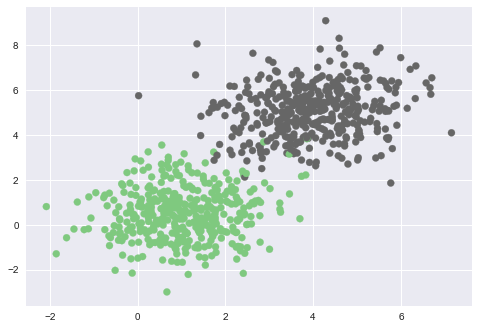

In [25]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

[2.50587397 2.80547341]
[1.80536595 2.54396593]


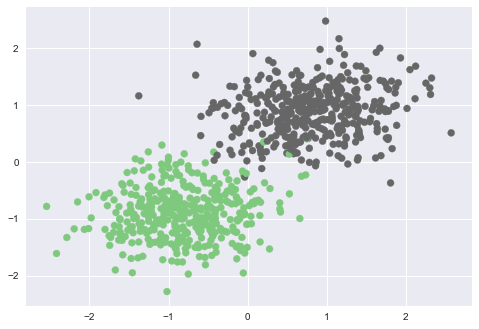

In [26]:
# Data Normalization

x_mean = X_train.mean(axis=0) #if axis=1 ,mean along column
                            # if axis =0, mean along row
x_std = X_train.std(axis=0)
print(x_mean)
print(x_std)

# Apply the transformation
X_train = (X_train - x_mean)/x_std

# Apply the same transformation on Test data
X_test = (X_test - x_mean)/x_std

# visualize normalised data
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()


In [28]:
X_train.mean(axis=0)
X_train.std(axis=0)

array([1., 1.])

# Logistic regression implemention 
    - data set is ready already

In [44]:
# Vectorised code Implementation

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X,theta):
    """
    X = entire array(m,n+1)
    theta = np.array(n+1,1)
    """
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    """
    X = entire array(m,n+1)
    y = np.array(m,1)
    theta = np.array(n+1,1)
    
    return:
        scale_value = loss
    """
    # Binary cross entropy loss
    hi = hypothesis(X,theta)
    e = -1*np.mean(y*np.log(hi) + ((1-y)*np.log(1-hi)))
    
    return e


In [54]:
# gradient descent function

def gradient(X,y,theta):
    """
    X = entire array(m,n+1)
    y = np.array(m,1)
    theta = np.array(n+1,1)
    
    return:
        gradien_vector - (n+1,q=1)
    """
    hi = hypothesis(X,theta)
    grad = -1*np.dot(X.T,(y-hi))
    m = X.shape[0]
    return grad/m
    
    
def gradient_descent(X,y,lr=0.1,max_itr=500):
    
    n = X.shape[1]
    theta = np.zeros((n,1))
    
    error_list = []
    # Assignment = Change the Stoppint Criteria
    # when Delta E is very small, stop the loop
    for i in range(max_itr):
        err = error(X,y,theta)
        error_list.append(err)
        grad = gradient(X,y,theta)
        #update
        theta = theta - lr*grad
    
    return theta,error_list
    
    

In [40]:
print(X_train.shape) # (800,2)
ones = np.ones((X_train.shape[0],1))
X_New_train = np.hstack((ones,X_train))
print(X_New_train.shape)

(800, 3)

In [57]:
Y_train = Y_train.reshape((-1,1)) # not necessary

In [58]:
theta,error_list = gradient_descent(X_New_train,Y_train)

[[0.10402638]
 [2.06420611]
 [2.91151425]]


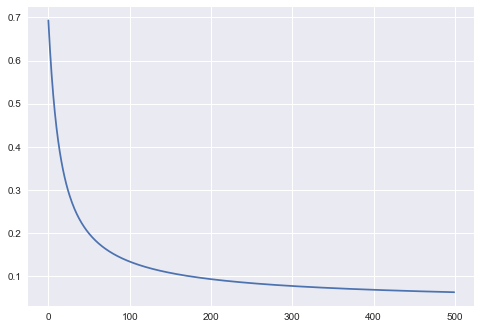

In [61]:
print(theta)
plt.plot(error_list)
# change learning rate and observe the curve

# Visualize Decision Surface

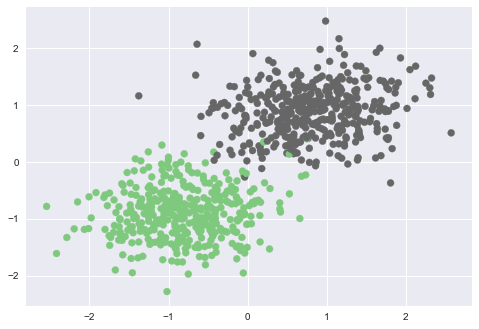

In [63]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1,)),cmap=plt.cm.Accent)
plt.show()

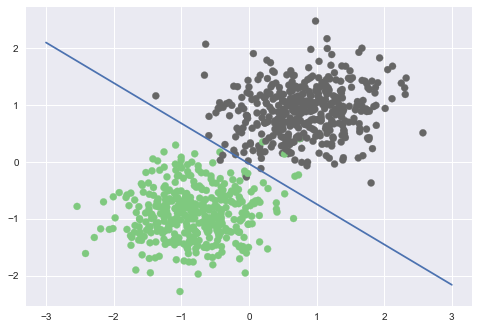

In [64]:
x1 = np.arange(-3,4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1,)),cmap=plt.cm.Accent)
plt.plot(x1,x2)
plt.show()


# Predictions and Accuracy

In [65]:
X_New_Test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
print(X_New_Test.shape)
print(X_New_Test[:3,:])

(200, 3)
[[ 1.          1.13002241  1.28373168]
 [ 1.         -1.33521163 -1.16353083]
 [ 1.         -0.46827234 -0.53930806]]


In [70]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    return output
XT_preds=predict(X_New_train,theta)
Xt_preds=predict(X_New_Test,theta)
print(XT_preds.shape)
print(Xt_preds.shape)

(800, 1)
(200, 1)


In [83]:
def accuracy(actual,preds):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    acc = np.sum(actual==preds)/actual.shape[0]
    
    return acc*100

In [84]:
train_acc = accuracy(Y_train,XT_preds)
test_acc = accuracy(Y_test,Xt_preds)
print(train_acc,test_acc)

99.0 99.5


## How Sk-Learn is used to create Logistic regression??

In [85]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression()

In [88]:
model.fit(X_train,Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
theta_0 = model.intercept_
theta_s = model.coef_

print(theta_0,theta_s)

[0.11149813] [[2.32726207 4.63165795]]


In [91]:
model.score(X_train,Y_train)

0.98875

In [92]:
model.score(X_test,Y_test)

0.99

In [95]:
Y_pred = model.predict(X_test)
Y_pred.shape


(200,)